# Data Formatting - CS254 Final Project 
04/09/2021  Mia Pienkowski

In [78]:
import os
import random
import numpy as np
import pandas as pd
import json


Currently the data format is: a folder of jpg files and a json file corresponding to each jpg file.  Each json file contains the information of wheather or not each of the three types of towers (tower_wooden, tower_lattice, and tower_tucohy) are in the jpg.  The goal is to reformat the data so that we have a table displaying the name of each jpd file as well as an inidicator variable for each of the three tower types.

In [79]:
#create a dataframe containing the names of all of the jpgs in the full dataset
fileList = []
for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data'):
    if file.endswith(".jpg"):
        fileList.append(file)
        
df = pd.DataFrame(fileList)

#also creating an index to use later in extracting the img labels from the json files
index = df.index

#formatting the dataframe
df = df.rename(columns={0: "Id"}) 
df['labels'] = df.Id
df['labels'] = df['labels'].str.replace('.jpg','')
df['tower_wooden'] = ""
df['tower_lattice'] = ""
df['tower_tucohy'] = ""

df.head()

,Id,labels,tower_wooden,tower_lattice,tower_tucohy
0,04_2220.jpg,04_2220,,,
1,04_3420.jpg,04_3420,,,
2,04_585.jpg,04_585,,,
3,06_5355.jpg,06_5355,,,
4,07_1035.jpg,07_1035,,,


In [80]:
index = df.index
for file in os.listdir('C:/Users/miapi/Downloads/ttpla_dataset/sized_data'):
    if file.endswith(".json"):
        
        #load file as json object
        filePath = ("C:/Users/miapi/Downloads/ttpla_dataset/sized_data/"+file)
        f = open(filePath,)
        json_file = json.load(f)
        #get file namme without extension
        file2 = file.replace('.json','')
        
        #find designated jpeg (row in df)
        #rslt_df = df.loc[df['labels'] == file2]
        apples_indices = index[df['labels'] == file2]
        
        #parse json file to see if tower_wooden, tower_lattice, or tower_tucohy exists
        #add 0 or 1 to the corresponding dataframe row accordingly
        
        for element in json_file['shapes']:
            
            #tower wooden
            bool_wood = any(sd['label']=='tower_wooden' for sd in json_file['shapes'])  
            if bool_wood:
                df.at[apples_indices,'tower_wooden']= '1'
            else:
                df.at[apples_indices,'tower_wooden']= '0' 
                
            #tower lattice
            bool_lat = any(sd['label']=='tower_lattice' for sd in json_file['shapes']) 
            if bool_lat:
                df.at[apples_indices,'tower_lattice']= '1'
            else:
                df.at[apples_indices,'tower_lattice']= '0'
                
            #tower tucohy
            bool_tuc = any(sd['label']=='tower_tucohy' for sd in json_file['shapes']) 
            if bool_tuc:
                df.at[apples_indices,'tower_tucohy']= '1'
            else:
                df.at[apples_indices,'tower_tucohy']= '0'

In [81]:
#show the whole dataframe
pd.set_option('display.max_rows', 1250)
df

,Id,labels,tower_wooden,tower_lattice,tower_tucohy
0,04_2220.jpg,04_2220,0,0,0
1,04_3420.jpg,04_3420,1,0,0
2,04_585.jpg,04_585,1,0,0
3,06_5355.jpg,06_5355,0,0,0
4,07_1035.jpg,07_1035,1,1,0
5,07_1875.jpg,07_1875,1,0,0
6,08_1725.jpg,08_1725,1,0,0
7,08_1830.jpg,08_1830,1,0,0
8,08_1890.jpg,08_1890,1,0,0
9,09_1755.jpg,09_1755,0,0,0


In [82]:
#checking to see if the labels were coded properly
df.tower_wooden.unique()
blankDat = df.loc[df['tower_wooden'] == '']
blankDat.head()

,Id,labels,tower_wooden,tower_lattice,tower_tucohy


For each of the three tower types, instance 39 isn't labeled properly.  Since it is only one instance of 1241, we remove it.  

In [77]:
#df = df.drop(39)

KeyError: '[39] not found in axis'

In [73]:
if (df['towers'][1][0] == '1'):
    print('pizza')

pizza


In [94]:
#create column containing info for all of the towers
df['towers'] = df[['tower_wooden', 'tower_lattice','tower_tucohy']].values.tolist()
df['tower_labels'] = np.empty((len(df), 0)).tolist()
for i in range(len(df)):
    
    if df['towers'][i][0] == '1':
        df['tower_labels'][i].append("tower_wooden")
    
    if df['towers'][i][1] == '1':
        df['tower_labels'][i].append("tower_lattice")
        
    if df['towers'][i][2] == '1':
        df['tower_labels'][i].append("tower_tucohy")
df.head()

,Id,labels,tower_wooden,tower_lattice,tower_tucohy,towers,new_column,tower_labels
0,04_2220.jpg,04_2220,0,0,0,"[0, 0, 0]",[],[]
1,04_3420.jpg,04_3420,1,0,0,"[1, 0, 0]","[tower_wooden, tower_wooden]",[tower_wooden]
2,04_585.jpg,04_585,1,0,0,"[1, 0, 0]","[tower_wooden, tower_wooden]",[tower_wooden]
3,06_5355.jpg,06_5355,0,0,0,"[0, 0, 0]",[],[]
4,07_1035.jpg,07_1035,1,1,0,"[1, 1, 0]","[tower_wooden, tower_lattice, tower_wooden, to...","[tower_wooden, tower_lattice]"


In [86]:
#create a csv file from the dataframe
df.to_csv(r'C:\Users\miapi\Downloads\ttpla_dataset\cs254FinalProject\formatedData_april09.csv', index = False)

In [95]:
#need to split the data into testing, training, and validating
random.seed(123)
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

In [96]:
train.head()

,Id,labels,tower_wooden,tower_lattice,tower_tucohy,towers,new_column,tower_labels
916,57_00986.jpg,57_00986,1,0,0,"[1, 0, 0]","[tower_wooden, tower_wooden]",[tower_wooden]
86,13_00184.jpg,13_00184,0,1,0,"[0, 1, 0]","[tower_lattice, tower_lattice]",[tower_lattice]
247,25_00356.jpg,25_00356,0,0,1,"[0, 0, 1]","[tower_tucohy, tower_tucohy]",[tower_tucohy]
355,31_00832.jpg,31_00832,0,0,0,"[0, 0, 0]",[],[]
618,42_00561.jpg,42_00561,0,0,0,"[0, 0, 0]",[],[]


# Moving on from data format

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [89]:
train.iloc[1][0]


'13_00184.jpg'

In [45]:
#reading in all of the training images
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('C:/Users/miapi/Downloads/ttpla_dataset/sized_data/'+train.iloc[i][0],target_size=(700,700,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|████████████████████████████████████████████████████████████████████████████████| 744/744 [00:30<00:00, 24.57it/s]


In [46]:
#check shape of X
X.shape

(744, 700, 700, 3)

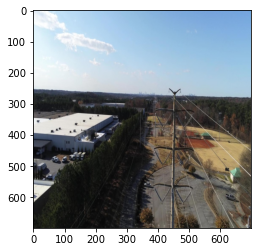

In [47]:
#visualizing one image 
plt.imshow(X[2])

In [97]:
train['tower_labels'][2]

['tower_wooden']

In [98]:
#remove the label columns from  train file 
#convert the remaining columns to an array which will be the target for our images:

y = np.array(train.drop(['Id', 'labels','towers','tower_labels'],axis=1))
y.shape

(744, 3)

In [99]:
#for now - just formatting it like this to go along with the tutorial
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [108]:
#model architecture
#modify by changing the number of hidden layers, activation functions and other hyperparameters
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(700,700,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

In [109]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 696, 696, 16)      1216      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 348, 348, 16)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 348, 348, 16)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 344, 344, 32)      12832     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 172, 172, 32)      0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 172, 172, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 168, 168, 64)     

In [110]:
#can use other optimizers/losses
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [111]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10


UnimplementedError:  Cast string to float is not supported
	 [[node binary_crossentropy/Cast (defined at <ipython-input-111-fe38f87c2df4>:1) ]] [Op:__inference_train_function_2034]

Function call stack:
train_function
